<a href="https://colab.research.google.com/github/hardik-vala/tensordiagram/blob/main/doc/guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A python library for visualizing tensors from torch, jax, tensorflow, numpy, etc. Helps with learning and debugging.

# quick start

In [1]:
!pip install -qqq tensordiagram

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.2 MB/s eta 0:00:00


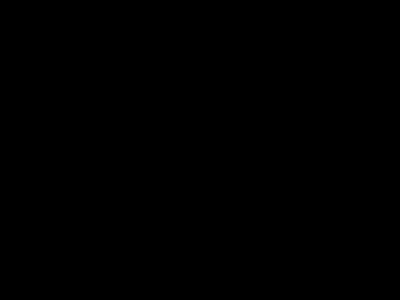

In [3]:
import numpy as np
import tensordiagram as td

td.set_default_height(300)

tensor = np.arange(12).reshape(3, 4)
diagram = td.to_diagram(tensor)
diagram

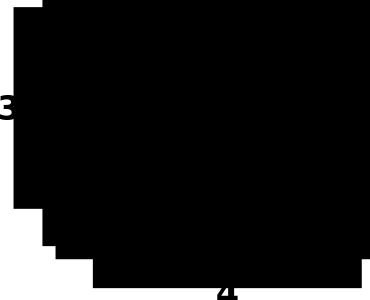

In [3]:
# Add color and show dimensions.

diagram.fill_color("blue").annotate_dim_size()

# working with torch, jax, etc. tensors

## torch

In [ ]:
import torch

tensor = torch.arange(12).reshape(3, 4)
td.to_diagram(tensor)

## jax

In [ ]:
import jax

tensor = jax.numpy.arange(12).reshape(3, 4)
td.to_diagram(tensor)

## tensorflow

In [ ]:
import tensorflow as tf

tensor = tf.reshape(tf.range(12), [3, 4])
td.to_diagram(tensor)

## mlx

In [ ]:
# Only works on apple silicon
# import mlx.core as mx

# tensor = mx.arange(12).reshape(3, 4)
# td.to_diagram(tensor)

## numpy

In [ ]:
import numpy as np

tensor = np.arange(12).reshape(3, 4)
td.to_diagram(tensor)

## shape

In [ ]:
td.to_diagram((3, 4))

# different tensor dimensions

In [4]:
papaya = "#ff9700"

## vector (1d tensor)

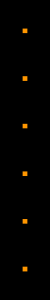

In [12]:
tensor = np.arange(6)
td.to_diagram(tensor).fill_color(papaya)

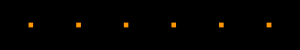

In [13]:
td.set_default_height(50)

shape = (1, 6)
td.to_diagram(shape).fill_color(papaya)

## 3d tensor

In [5]:
from colour import Color # all color strings in tensordiagram map to a Color obj
import chalk # general-purpose graphics backend behind tensordiagram

def add_background(diagram, bg_color="white"):
  # td diagrams just wrap chalk diagrams, allowing them to interoperate with chalk
  cd = diagram.to_chalk_diagram()
  env = cd.get_envelope()
  bg_width = max(5, env.width * 1.5)
  bg_height = max(4, env.height * 1.5)
  bgd = chalk.rectangle(bg_width, bg_height).fill_color(Color(bg_color))
  return bgd + cd.center_xy()

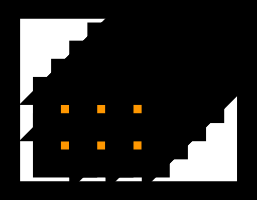

In [6]:
td.set_default_height(200)

tensor = np.arange(24).reshape((2, 3, 4))
diagram = td.to_diagram(tensor).fill_color(papaya)

add_background(diagram)

# styling

## color tensor

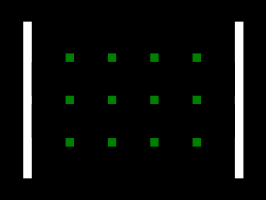

In [16]:
tensor = np.arange(12).reshape((3, 4))
diagram = td.to_diagram(tensor).fill_color("green") # white is the default color

add_background(diagram)

### adjust opacity

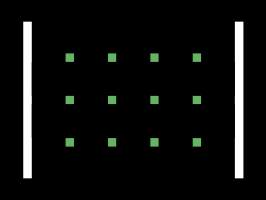

In [17]:
tensor = np.arange(12).reshape((3, 4))
diagram = td.to_diagram(tensor).fill_color("green").fill_opacity(0.6)

add_background(diagram)

### partially color

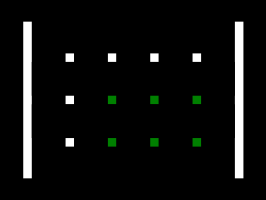

In [18]:
tensor = np.arange(12).reshape((3, 4))
diagram = td.to_diagram(tensor).fill_region(
    start_coord=(1, 1), # inclusive
    end_coord=(2, 3), #inclusive
    color="green",
    opacity=None,
)

add_background(diagram)

### gradient color

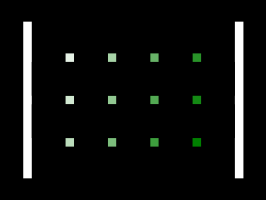

In [19]:
tensor = np.arange(12).reshape((3, 4))
diagram = td.to_diagram(tensor).fill_color("green").fill_opacity(0.1, 1.0)

add_background(diagram)

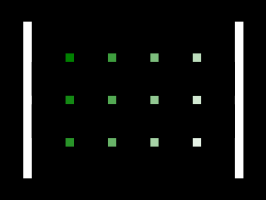

In [20]:
tensor = np.arange(12).reshape((3, 4))
diagram = td.to_diagram(tensor).fill_color("green").fill_opacity(1.0, 0.1) # reverse

add_background(diagram)

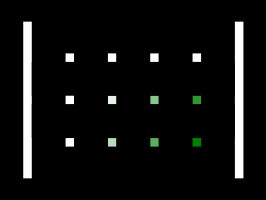

In [21]:
tensor = np.arange(12).reshape((3, 4))
diagram = td.to_diagram(tensor).fill_region(
    start_coord=(1, 1),
    end_coord=(2, 3),
    color="green",
    opacity=(0.1, 1.0),
)

add_background(diagram)

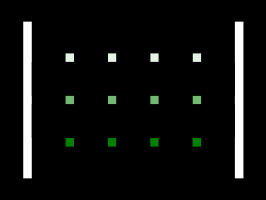

In [22]:
tensor = np.arange(12).reshape((3, 4))
# gradient over rows only
diagram = td.to_diagram(tensor).fill_color("green").fill_opacity(0.1, 1.0, td.TensorOrder.R)

add_background(diagram)

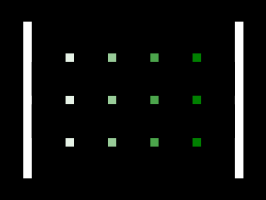

In [23]:
tensor = np.arange(12).reshape((3, 4))
# gradient over columns only
diagram = td.to_diagram(tensor).fill_color("green").fill_opacity(0.1, 1.0, td.TensorOrder.C)

add_background(diagram)

## show values

(not supported for 3D tensors)

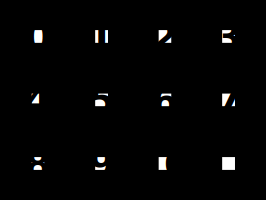

In [7]:
tensor = np.arange(12).reshape((3, 4))
td.to_diagram(tensor).fill_values()

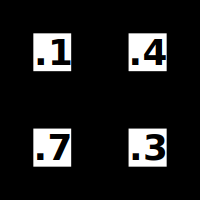

In [8]:
tensor = np.array([[0.123, 0.456], [0.789, 0.321]])
td.to_diagram(tensor).fill_values()

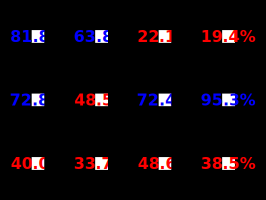

In [10]:
tensor = np.random.rand(3, 4)
td.to_diagram(tensor).fill_values(
    font_size=0.25,
    format=lambda idx, val: f"{val:.1%}",
    color=lambda idx, val: "red" if val < 0.5 else "blue"
)

# annotations

## tensor indices

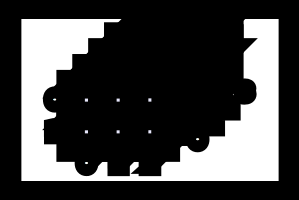

In [ ]:
tensor = np.arange(24).reshape((2, 3, 4))
diagram = td.to_diagram(tensor).fill_color("lavender").annotate_dim_indices()

add_background(diagram)

### custom color

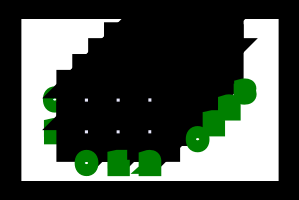

In [ ]:
tensor = np.arange(24).reshape((2, 3, 4))
diagram = td.to_diagram(tensor).fill_color("lavender").annotate_dim_indices(color="green")

add_background(diagram)

### select dimension

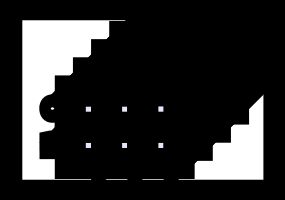

In [ ]:
tensor = np.arange(24).reshape((2, 3, 4))
diagram = td.to_diagram(tensor).fill_color("lavender").annotate_dim_indices(dim=0) # row, col, depth

add_background(diagram)

## dimension sizes

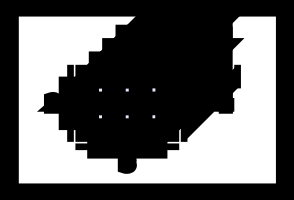

In [ ]:
tensor = np.arange(24).reshape((2, 3, 4))
diagram = td.to_diagram(tensor).fill_color("lavender").annotate_dim_size()

add_background(diagram)

### custom color

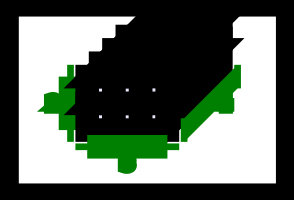

In [ ]:
tensor = np.arange(24).reshape((2, 3, 4))
diagram = td.to_diagram(tensor).fill_color("lavender").annotate_dim_size(color="green")

add_background(diagram)

### select dimension

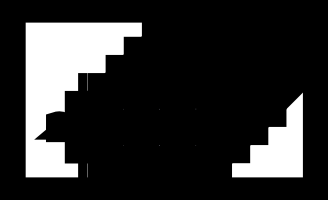

In [ ]:
tensor = np.arange(24).reshape((2, 3, 4))
diagram = td.to_diagram(tensor).fill_color("lavender").annotate_dim_size(dim=0) # row, col, depth

add_background(diagram)

# export image

In [ ]:
diagram = td.to_diagram((3, 4)).fill_color("blue")

# export as png (requires pycairo)
diagram.render_png("tensor_diagram.png", height=200)

# export as svg (requires cairosvg)
diagram.render_svg("tensor_diagram.svg", height=200)

# examples

## v - v.T in torch

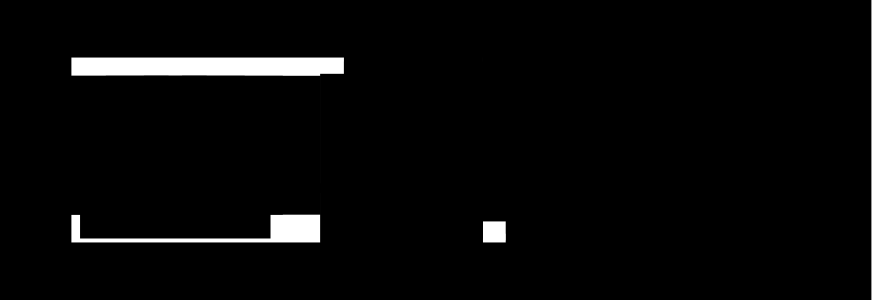

In [ ]:
import torch

# tensors
v = torch.arange(5).unsqueeze(0)
vt = v.T
res = v - vt

# tensor diagrams
v_diagram = td.to_diagram(v).fill_color("purple").fill_opacity(0.0, 0.8).fill_values().annotate_dim_size(dim=1)
vt_diagram = td.to_diagram(vt).fill_color("purple").fill_opacity(0.0, 0.8).fill_values().annotate_dim_size(dim=0)

def res_color_fn(idx, v):
  if v > 0:
    return "purple"
  elif v < 0:
    return "blue"
  return "white"

def res_opacity_fn(idx, v):
  return abs(v) / 5.0

res_diagram = td.to_diagram(res).fill_color(res_color_fn).fill_opacity(res_opacity_fn).fill_values().annotate_dim_size()

# chalk diagrams
v_chalk = v_diagram.to_chalk_diagram()
v_chalk = chalk.text("v", 0.6).fill_color(Color("black")).line_width(0.0) / chalk.vstrut(1.0) / v_chalk.center_xy()
vt_chalk = vt_diagram.to_chalk_diagram()
vt_chalk = chalk.text("v.T", 0.6).fill_color(Color("black")).line_width(0.0) / chalk.vstrut(1.0) / vt_chalk.center_xy()
res_diagram = res_diagram.to_chalk_diagram()

# composite diagram
minus = chalk.vstrut(1.0) / chalk.text("-", 0.6).fill_color(Color("black")).line_width(0.0)
equals = chalk.vstrut(1.0) / chalk.text("=", 0.6).fill_color(Color("black")).line_width(0.0)
composite = chalk.hcat([
    v_chalk.center_xy(),
    minus.center_xy(),
    vt_chalk.center_xy(),
    equals.center_xy(),
    res_diagram.center_xy()
  ], 1.0)

# add background + display
composite = composite.pad(1.2).center_xy()
env = composite.get_envelope()
chalk.set_svg_height(300)
chalk.rectangle(env.width, env.height).fill_color(Color("white")) + composite.translate(dx=env.width * 0.05, dy=0)


## tensor slicing in torch

In [ ]:
import random

color_names = [
    "red", "blue", "green", "purple", "orange", "pink", "white", "lavender",
    "cyan", "magenta", "brown", "gray", "olive", "maroon", "navy", "lightblue",
    "aquamarine", "turquoise", "violet", "indigo", "gold", "silver",
]

def random_colors_tensor(shape):
  colors_array = np.empty(shape, dtype=object)
  for index, _ in np.ndenumerate(colors_array):
    colors_array[index] = random.choice(color_names)
  return colors_array

color_tensor = random_colors_tensor(shape=(2, 3, 4))

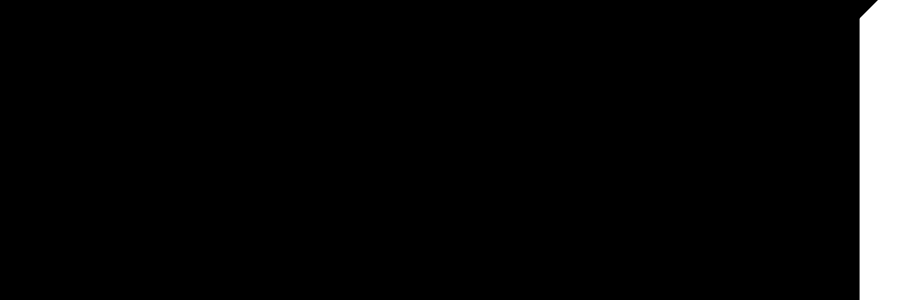

In [ ]:
import torch

# tensors
t = torch.arange(24).reshape((2, 3, 4))
slice_1 = t[0, :, :].unsqueeze(0)
slice_2 = t[:, 1, :].unsqueeze(1)

# tensor diagrams
t_d = td.to_diagram(t).fill_color(lambda idx, v: color_tensor[idx])
slice_1_d = td.to_diagram(slice_1).fill_color(lambda idx, v: color_tensor[idx])
slice_2_d = td.to_diagram(slice_2).fill_color(lambda idx, v: color_tensor[idx[0], 1, idx[2]])

# chalk diagrams
diagrams = []
for label, d in [("t", t_d), ("t[0, :, :]", slice_1_d), ("t[:, 1, :]", slice_2_d)]:
  chalk_diagram = d.to_chalk_diagram()
  chalk_diagram = chalk_diagram.center_xy() / chalk.vstrut(1.0) / chalk.text(label, 0.6).fill_color(Color("black")).line_width(0.0)
  diagrams.append(chalk_diagram.center_xy())

# composite diagram
composite = chalk.hcat(diagrams, 1.0)

# add background + display
composite = composite.pad(1.3).center_xy()
env = composite.get_envelope()
chalk.set_svg_height(300)
chalk.rectangle(env.width * 0.9, env.height).fill_color(Color("white")) + \
  composite.translate(dx=env.width * 0.06, dy=0)

# final notes

## functional API

The `TensorDiagram` is designed to be functional, so all styling and annotation methods return a new `TensorDiagram`, which lets you chain them together in arbitrary sequences:

```
diagram = (td.to_diagram((3, 4))
  .fill_color("lightblue")
  .fill_opacity(0.5)
  .annotate_dim_indices(dim=1)
  ...
)
```

## complex diagrams

You can combine `TensorDiagram` instances with `chalk` diagrams to create more complex diagrams. See [examples](#examples).

## colour.Color

Color values (e.g. "blue", "lavender", "#ff9700") are encoded internally as `colour.Color` objects, so make sure color values are compatible with the `colour` library.

## understanding sizes

`tensordiagram` uses an abstract, unitless coordinate system inherited from [chalk](https://chalk-diagrams.github.io). Size values (like `cell_size` and `font_size`) have no inherent physical meaning until rendering.

### how it works

**internal representation:**
- All sizes are specified in abstract units (e.g. `font_size=0.5`)
- These values are relative to each other within the diagram
- The size of each side of a tensor cell is fixed to `1.0`.

**during rendering:**
- You specify output dimensions in pixels (e.g., `height=256`)
- The library calculates a scale factor to fit the diagram into the target size
- All abstract units are multiplied by this scale factor

**example:**
```python
import tensordiagram as td

# Create a 3x4 diagram (cell_size=1.0)
diagram = td.to_diagram((3, 4))

# Render at different heights
diagram.render_png("small.png", height=128)   # cells are ~32 pixels
diagram.render_png("large.png", height=512)   # cells are ~128 pixels
```

If the diagram's abstract height is 3.0 units and you render at `height=300` pixels, the scale factor is ~100, so `font_size=0.5` → ~50 pixels.



# contributing and support

For issues, feature requests, or contributions, please visit the [github repo](https://github.com/hardik-vala/tensordiagram).

---

License: MIT